In [ ]:
!pip install healpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits

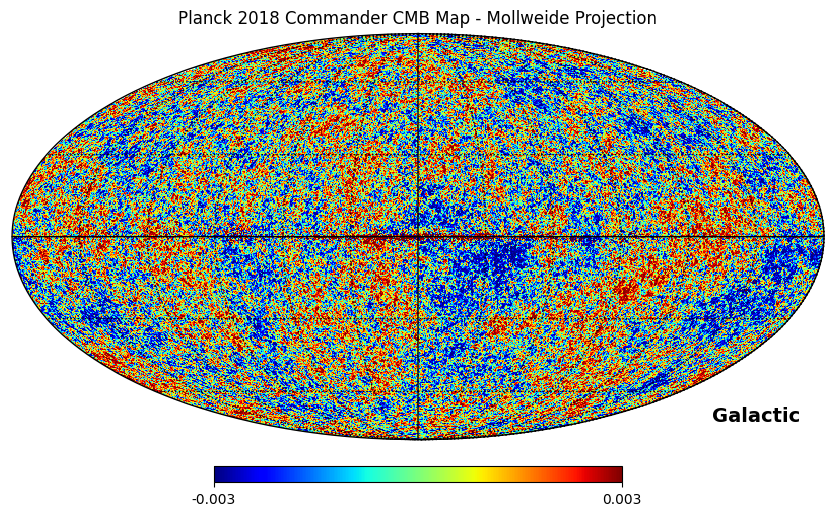

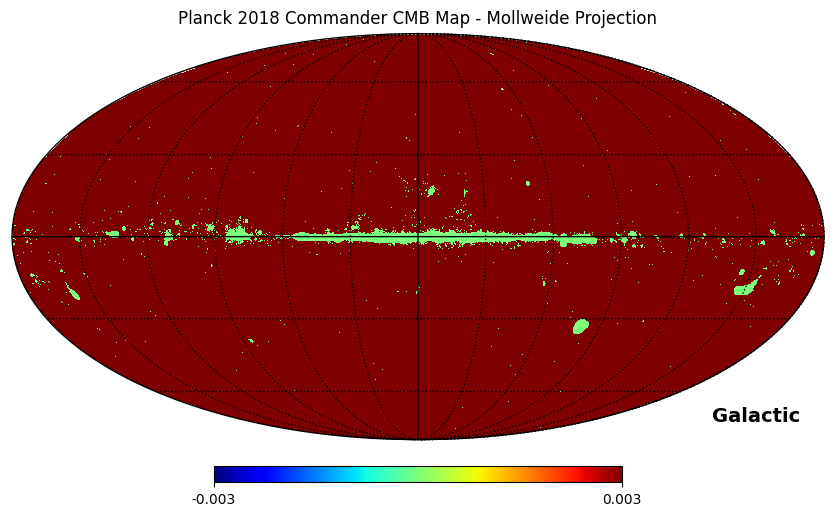

In [ ]:
cmb_map = hp.read_map('/content/COM_CMB_IQU-commander_2048_R3.00_full.fits')

hp.mollview(cmb_map, title="Planck 2018 Commander CMB Map - Mollweide Projection",
            coord='G', cmap='jet', norm='hist',
            min=-0.003, max=0.003)

# Add graticule (grid lines)
hp.graticule()

plt.show()

cmb_mask_map = hp.read_map('/content/COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits')

hp.mollview(cmb_mask_map, title="Planck 2018 Commander CMB Map - Mollweide Projection",
            coord='G', cmap='jet', norm='hist',
            min=-0.003, max=0.003)

# Add graticule (grid lines)
hp.graticule()

plt.show()

<Figure size 1000x500 with 0 Axes>

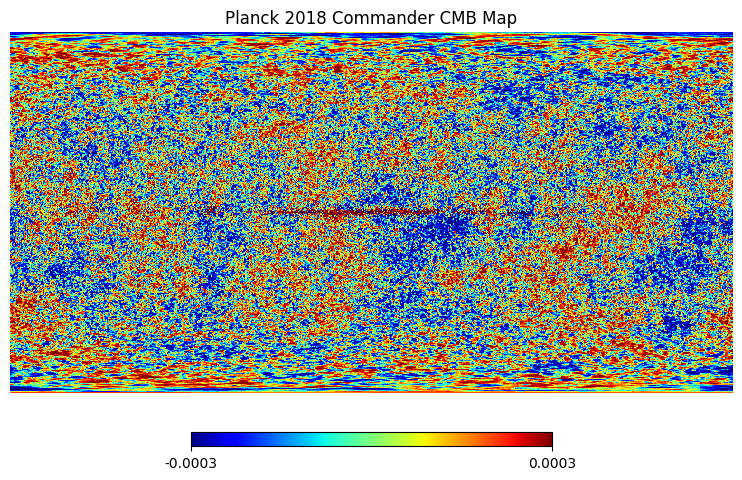

In [ ]:
plt.figure(figsize=(10, 5))

# Display the map in Cartesian projection
hp.cartview(cmb_map, title="Planck 2018 Commander CMB Map",
            lonra=[-180, 180], latra=[-90, 90],
            cmap='jet', norm='hist',
            min=-0.0003, max=0.0003)

plt.show()

In [ ]:
import requests
from pathlib import Path

#download helper function from learn pytorch repo (if its not alr downloaded)
if Path('libs_Map_Cutter.py').is_file():
  print('libs_Map_Cutter.py already exists, skipping download')
else:
  print('download libs_Map_Cutter.py')
  request = requests.get("https://raw.githubusercontent.com/ykiiiiii/CosmoVAE/refs/heads/master/libs/Map_Cutter.py")
  with open('libs_Map_Cutter.py', 'wb') as f:
    f.write(request.content)


download libs_Map_Cutter.py


In [ ]:
from __future__ import division
import matplotlib
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from optparse import OptionParser
from libs_Map_Cutter import MapCutter
from sklearn.model_selection import train_test_split
import gc

matplotlib.use('Agg')

parser = OptionParser()
parser.add_option("--sv_dir",
                  dest="sv_dir", default='datasets',
                  help="output file")

parser.add_option("--map_loc",
                  dest="CMB_map_loc", default='/content/COM_CMB_IQU-commander_2048_R3.00_full.fits',
                  help="the path and file name of CMB Commander archive file ")

parser.add_option("--mask_loc",
                  dest="mask_map_loc", default='/content/COM_Mask_CMB-Inpainting-Mask-Int_2048_R3.00.fits',
                  help="the path and file name of CMB mask archive file ")

parser.add_option("--cropping_step",
                  dest="cropping_step", default=2,
                  help="the step of cropping full-sky CMB map when generate the dataset"
                       + "if you want to generate a larger dataset, you can make this number smaller"
                  )

options, args = parser.parse_args([])
MP = MapCutter(options.CMB_map_loc)
MP_mask = MapCutter(options.mask_map_loc)

lat_range = list(range(-20, 25, int(options.cropping_step)))
batch_size = 10  # Adjust based on your available memory

# Process and save images directly without storing in lists
for j, theta in enumerate(lat_range):
    lon_range = np.arange(0, 360, int(options.cropping_step) / np.cos(theta / 180. * np.pi))
    for i, phi in enumerate(lon_range):
        map_cut = MP.cut_map([phi, theta], res=400)
        mask_cut = MP_mask.cut_map([phi, theta], res=400)

        if (400**2 - mask_cut.sum() > 10890):
            sv_dir_path = os.path.join(options.sv_dir, 'test/data/')
            os.makedirs(sv_dir_path, exist_ok=True)  # exist_ok=True prevents error if dir exists
            sv = os.path.join(sv_dir_path, f'{j}-{i}pict.png')
            plt.imsave(sv, map_cut)
        else:
            # Create the full directory path if it doesn't exist
            sv_dir_path = os.path.join(options.sv_dir, 'train/data/')
            os.makedirs(sv_dir_path, exist_ok=True)  # exist_ok=True prevents error if dir exists
            sv = os.path.join(sv_dir_path, f'{j}-{i}pict.png')
            plt.imsave(sv, map_cut)

        # Clear variables after use and call garbage collector periodically
        del map_cut, mask_cut
        gc.collect()



In [ ]:
for j, theta in enumerate(lat_range):
    lon_range = np.arange(0, 360, int(options.cropping_step) / np.cos(theta / 180. * np.pi))
    for i, phi in enumerate(lon_range):
          mask_cut = MP_mask.cut_map([phi, theta], res=400)
          sv_dir_path = os.path.join(options.sv_dir, 'mask/data/')
          os.makedirs(sv_dir_path, exist_ok=True)  # exist_ok=True prevents error if dir exists
          sv = os.path.join(sv_dir_path, f'{j}-{i}pict.png')
          plt.imsave(sv, mask_cut)

        # Clear variable after use and call garbage collector
          del mask_cut
          gc.collect()

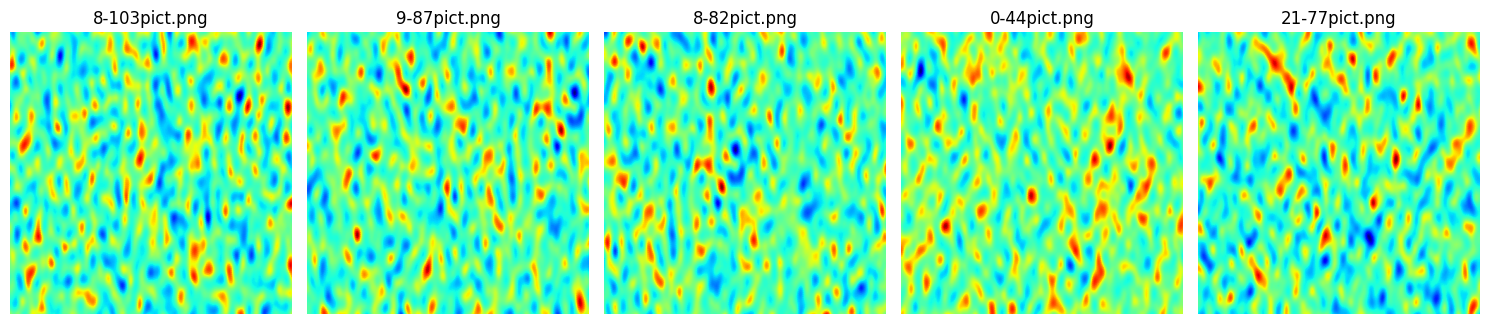

[[113 113 115 ... 103 102 100]
 [115 115 116 ... 104 102  99]
 [115 115 118 ... 104 101  99]
 ...
 [ 99 101 104 ... 119 118 117]
 [101 104 106 ... 118 117 115]
 [101 104 108 ... 118 117 115]]


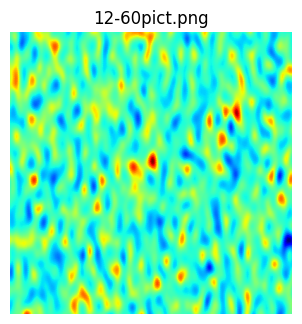

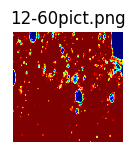

[[134 135 131 ... 137 139 139]
 [135 135 132 ... 137 139 139]
 [133 135 134 ... 139 139 139]
 ...
 [106 107 108 ... 116 121 124]
 [106 108 109 ... 117 123 127]
 [107 108 109 ... 120 124 127]]


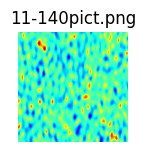

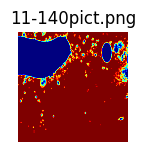

[[106 106 105 ...  83  81  82]
 [104 104 104 ...  84  84  85]
 [101 102 102 ...  86  87  88]
 ...
 [103 103 103 ... 144 148 151]
 [102 102 102 ... 149 153 157]
 [101 102 102 ... 149 158 162]]


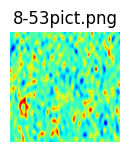

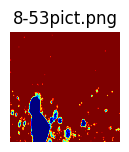

[[ 89  94  96 ... 103 102  99]
 [ 93  94  96 ... 100  99  99]
 [ 97  99 100 ...  98  97  97]
 ...
 [133 135 134 ...  99 100 102]
 [135 137 137 ...  99 100 103]
 [133 137 137 ... 100 101 103]]


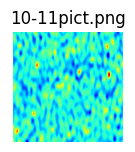

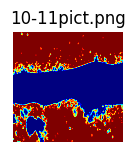

[[116 116 117 ... 118 119 118]
 [117 117 118 ... 122 123 122]
 [117 118 119 ... 123 124 123]
 ...
 [117 120 120 ... 100 105 115]
 [117 118 118 ... 102 107 112]
 [114 115 115 ... 101 106 111]]


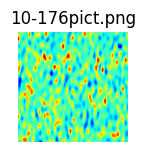

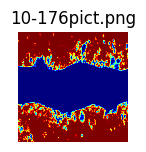

In [ ]:
import numpy as np
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
#from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

def get_random_images(folder_path, num_images=5):
    # List all files in the directory
    files = os.listdir(folder_path)
    # Filter out only PNG files
    images = [file for file in files if file.lower().endswith('.png')]

    # Select random images
    selected_images = random.sample(images, min(num_images, len(images)))

    return [os.path.join(folder_path, img) for img in selected_images]

def get_random_images_2(folder_path1, folder_path2, num_images=5):
    # List all files in the directory
    files1 = os.listdir(folder_path1)
    # Filter out only PNG files
    images1 = [file for file in files1 if file.lower().endswith('.png')]

    # Select random images
    selected_images = random.sample(images1, min(num_images, len(images1)))

    return [os.path.join(folder_path1, img) for img in selected_images], [os.path.join(folder_path2, img) for img in selected_images]


def display_images(image_paths):
    plt.figure(figsize=(15, 10))


    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path).convert('L')  # Convert image to grayscale
        img_array = np.array(img)  # Convert image to numpy array

        # Normalize the image array to range [0, 1]
        img_normalized = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))# Convert image to numpy array

        # Use 'jet' colormap for displaying the image
        plt.subplot(1, len(image_paths), i + 1)
        plt.imshow(img_array, cmap= 'jet')
        plt.axis('off')  # Hide axes
        plt.title(os.path.basename(img_path))  # Show image name as title

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


def display_images_2(image_paths1, image_paths2):
    plt.figure(figsize=(15, 10))


    for i, (img_path1, img_path2) in enumerate(zip(image_paths1, image_paths2)):
        img1 = Image.open(img_path1).convert('L')
        img2 = Image.open(img_path2).convert('L')
          # Convert image to grayscale
        img_array1 = np.array(img1)
        print(img_array1)
        img_array2 = np.array(img2)
          # Convert image to numpy array

        # Normalize the image array to range [0, 1]
        img_normalized1 = (img_array1 - np.min(img_array1)) / (np.max(img_array1) - np.min(img_array1))# Convert image to numpy array
        img_normalized2 = (img_array2 - np.min(img_array2)) / (np.max(img_array2) - np.min(img_array2))
        # Use 'jet' colormap for displaying the image
        plt.subplot(1, len(image_paths1), i + 1)
        plt.imshow(img_array1, cmap= 'jet')
        plt.axis('off')  # Hide axes
        plt.title(os.path.basename(img_path1))
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()
        plt.subplot(1, len(image_paths2), i + 1)
        plt.imshow(img_array2, cmap= 'jet')
        plt.axis('off')  # Hide axes
        plt.title(os.path.basename(img_path2))
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()
         # Show image name as title

    #plt.tight_layout()  # Adjust layout to prevent overlap
    #plt.show()


if __name__ == "__main__":
    train_folder = '/content/datasets/train/data'
    test_folder = '/content/datasets/test/data'
    mask_folder = '/content/datasets/mask/data'



random_train_images = get_random_images(train_folder)
random_test_images, random_mask_images = get_random_images_2(test_folder, mask_folder)

display_images(random_train_images)
display_images_2(random_test_images, random_mask_images)

In [ ]:
import torch
def load_image_as_tensor(image_path):
    image = Image.open(image_path).convert('RGB')  # Convert to RGB if needed
    image_array = np.array(image, dtype=np.float32)
    return torch.from_numpy(image_array).permute(2,0,1)   # Change to CxHxW format

def apply_mask(image_tensor, mask_tensor):
    # Ensure both tensors are of the same shape
    assert image_tensor.shape == mask_tensor.shape, "Image and mask must have the same dimensions"

    # Create a masked image where masked pixels are set to zero (black)
    #masked_image = (image_tensor + mask_tensor)/2 # Assuming mask has non-zero values where we want to keep pixels
    masked_image = torch.clone(image_tensor)
    #mask_numpy /= 255
    #masked_image[(mask_tensor == mask_tensor.min()).all()] = 0
    masked_image = image_tensor * mask_tensor
    return torch.tensor(masked_image)


In [ ]:
def mask_test_images_and_return_tensor(mask_folder, image_folder, masked_folder):
    if not os.path.exists(masked_folder):
        os.makedirs(masked_folder)

    masked_images = []
    for filename in os.listdir(mask_folder):
        if filename.endswith('.png'):
            # Load mask and image tensors
            mask_path = os.path.join(mask_folder, filename)
            image_path = os.path.join(image_folder, filename)

            if os.path.exists(image_path):
                mask_tensor = load_image_as_tensor(mask_path) / 255.0
                image_tensor = load_image_as_tensor(image_path) / 255.0

                   # Apply mask
                masked_image = apply_mask(image_tensor, mask_tensor)
                masked_images.append(masked_image)

                    # Convert back to PIL Image and save
                masked_image_rescaled = (masked_image * 255).byte()
                masked_image_pil = Image.fromarray(masked_image_rescaled.permute(1, 2, 0).numpy())
                masked_image_pil.save(os.path.join(masked_folder, filename))

    return torch.stack(masked_images, dim=0)

In [ ]:
mask_folder = '/content/datasets/mask/data'
test_folder = '/content/datasets/test/data'
masked_folder = '/content/datasets/masked/data'
train_folder = '/content/datasets/train/data'

masked_test_tensor = mask_test_images_and_return_tensor(mask_folder, test_folder, masked_folder)

<ipython-input-9-84cc65678fee>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(masked_image)


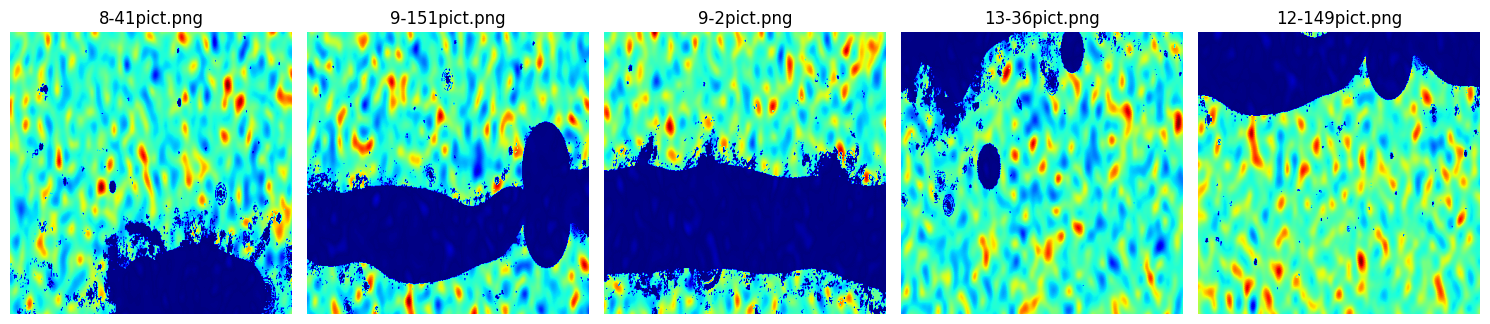

In [ ]:
random_masked_images = get_random_images(masked_folder)

display_images(random_masked_images)

In [ ]:
masked_test_tensor.shape

torch.Size([771, 3, 400, 400])

In [ ]:
'''batch_size = 10  # Choose a batch size that fits your memory
train_images = []
for i in range(0, len(os.listdir(train_folder)), batch_size):
    batch_filenames = os.listdir(train_folder)[i:i + batch_size]
    batch_images = []
    for filename in batch_filenames:
        if filename.endswith('.png'):
            train_path = os.path.join(train_folder, filename)
            if os.path.exists(train_path):
                train_tensor = load_image_as_tensor(train_path)
                batch_images.append(train_tensor)

    train_images.append(torch.stack(batch_images, dim=0))'''

"batch_size = 10  # Choose a batch size that fits your memory\ntrain_images = []\nfor i in range(0, len(os.listdir(train_folder)), batch_size):\n    batch_filenames = os.listdir(train_folder)[i:i + batch_size]\n    batch_images = []\n    for filename in batch_filenames:\n        if filename.endswith('.png'):\n            train_path = os.path.join(train_folder, filename)\n            if os.path.exists(train_path):\n                train_tensor = load_image_as_tensor(train_path)\n                batch_images.append(train_tensor)\n\n    train_images.append(torch.stack(batch_images, dim=0))"

In [ ]:
'''import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm  # For progress bars
import matplotlib.pyplot as plt

# Define the VAE class (U-Net like architecture)
class VAE(nn.Module):
    def __init__(self, latent_dim=2507):
        super(VAE, self).__init__()

        # Encoder network (U-Net inspired)
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
        )

        # Latent space (mean and log variance)
        sample_input = torch.randn(1, 3, 400, 400) # Create a sample input with the correct shape
        encoder_output = self.encoder(sample_input)
        self.encoder_output_shape = encoder_output.shape
        encoder_output_size = encoder_output.numel() // encoder_output.size(0)
        self.fc_mu = nn.Linear(encoder_output_size, latent_dim)  # Adjust based on input image size (400x400)
        self.fc_log_var = nn.Linear(encoder_output_size, latent_dim)



        # Decoder network (U-Net inspired)
        self.decoder_fc = nn.Linear(latent_dim, encoder_output_size)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),  # Sigmoid for pixel-wise reconstruction
        )

        self.final_adjust = nn.AdaptiveAvgPool2d((400, 400))

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(h.size(0), -1)  # Flatten before fully connected
        mu = self.fc_mu(h)
        log_var = self.fc_log_var(h)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.decoder_fc(z)
        h = h.view(h.size(0), *self.encoder_output_shape[1:])  # Reshape for decoder
        decoded = self.decoder(h)
        # Apply final size adjustment if needed
        if decoded.size(-1) != 400:
            decoded = self.final_adjust(decoded)
        return decoded

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        reconstructed = self.decode(z)
        return reconstructed, mu, log_var
'''


'import torch\nimport torch.nn as nn\nimport torch.optim as optim\nfrom tqdm import tqdm  # For progress bars\nimport matplotlib.pyplot as plt\n\n# Define the VAE class (U-Net like architecture)\nclass VAE(nn.Module):\n    def __init__(self, latent_dim=2507):\n        super(VAE, self).__init__()\n\n        # Encoder network (U-Net inspired)\n        self.encoder = nn.Sequential(\n            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),\n            nn.ReLU(),\n            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),\n            nn.ReLU(),\n            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),\n            nn.ReLU(),\n            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),\n            nn.ReLU(),\n            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1),\n            nn.ReLU(),\n            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1),\n            nn.ReLU(),\n        )\n\n        # Latent space (mean and log varianc

In [ ]:
from torch.utils.data import Dataset, DataLoader
import os

class CustomImageDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_filenames = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        filename = self.image_filenames[idx]
        image_path = os.path.join(self.folder_path, filename)

        # Load the image as a tensor
        image_tensor = load_image_as_tensor(image_path)

        # Apply any transformations if specified
        if self.transform:
            image_tensor = self.transform(image_tensor)

        return image_tensor

In [ ]:
# Create dataset instance
train_dataset = CustomImageDataset(train_folder)

# Create DataLoader
batch_size = 2  # Adjust this to fit your memory constraints
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)



In [ ]:
print(len(train_loader))

1636


In [ ]:
'''import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.cuda.amp import autocast, GradScaler
import gc

def loss_function(reconstructed, original, mu, log_var):
    reconstruction_loss = nn.MSELoss()(reconstructed, original)
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + kl_divergence / original.size(0)

# Set memory management settings
torch.cuda.empty_cache()
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True
    # Set environment variable for memory allocation
    import os
    os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:512'

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the VAE model
latent_dim = 2507
vae = VAE(latent_dim=latent_dim).to(device)

# Optimizer with gradient clipping
optimizer = optim.Adam(vae.parameters(), lr=2e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

# Gradient scaler for mixed precision training
scaler = GradScaler()

# Training Loop with memory optimizations
'''
num_epochs = 20

batch_size = 4  # Reduced batch size
accumulation_steps = 8
'''
# Calculate effective batch size
effective_batch_size = batch_size * accumulation_steps

def train_epoch(model, train_loader, optimizer, scaler, device, accumulation_steps):
    model.train()
    total_loss = 0
    optimizer.zero_grad()

    for i, images in enumerate(tqdm(train_loader, desc="Training")):
        images = images.to(device, non_blocking=True)

        # Mixed precision training
        with autocast():
            reconstructed, mu, log_var = model(images)
            loss = loss_function(reconstructed, images, mu, log_var)
            loss = loss / accumulation_steps

        # Scaled backward pass
        scaler.scale(loss).backward()

        if (i + 1) % accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

            # Clear cache periodically
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        total_loss += loss.item() * accumulation_steps

        # Delete unnecessary tensors
        del reconstructed, mu, log_var, loss

    return total_loss / len(train_loader)

# Main training loop
best_loss = float('inf')
for epoch in range(num_epochs):
    # Clear cache before each epoch
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()

    avg_loss = train_epoch(vae, train_loader, optimizer, scaler, device, accumulation_steps)

    # Learning rate scheduling
    scheduler.step(avg_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Save best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': vae.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_loss,
        }, "vae_cmb_best.pth")

# Evaluation function
@torch.no_grad()
def evaluate(model, test_images, num_samples=5):
    model.eval()
    test_images = test_images.to(device)

    # Process in smaller batches
    batch_size = 2
    reconstructed_images = []

    for i in range(0, num_samples, batch_size):
        batch = test_images[i:i+batch_size]
        reconstructed_batch, _, _ = model(batch)
        reconstructed_images.append(reconstructed_batch.cpu())

        # Clear cache after each batch
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    reconstructed_images = torch.cat(reconstructed_images, dim=0)

    # Visualization
    for i in range(min(num_samples, len(reconstructed_images))):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(test_images[i].cpu().permute(1, 2, 0).numpy())
        plt.title("Original Masked Image")

        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_images[i].permute(1, 2, 0).numpy())
        plt.title("Reconstructed Image")

        plt.show()
        plt.close()

# Evaluate the model
evaluate(vae, masked_test_tensor, num_samples=5)'''

'\n# Calculate effective batch size\neffective_batch_size = batch_size * accumulation_steps\n\ndef train_epoch(model, train_loader, optimizer, scaler, device, accumulation_steps):\n    model.train()\n    total_loss = 0\n    optimizer.zero_grad()\n\n    for i, images in enumerate(tqdm(train_loader, desc="Training")):\n        images = images.to(device, non_blocking=True)\n\n        # Mixed precision training\n        with autocast():\n            reconstructed, mu, log_var = model(images)\n            loss = loss_function(reconstructed, images, mu, log_var)\n            loss = loss / accumulation_steps\n\n        # Scaled backward pass\n        scaler.scale(loss).backward()\n\n        if (i + 1) % accumulation_steps == 0:\n            scaler.step(optimizer)\n            scaler.update()\n            optimizer.zero_grad()\n\n            # Clear cache periodically\n            if torch.cuda.is_available():\n                torch.cuda.empty_cache()\n\n        total_loss += loss.item() * acc

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1)  # Output: 32x200x200
        self.enc_conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1) # Output: 64x100x100
        self.enc_conv3 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1) # Output: 128x50x50
        self.fc_mu = nn.Linear(128 * 50 * 50, 256)  # Mean
        self.fc_logvar = nn.Linear(128 * 50 * 50, 256)  # Log variance

        # Decoder
        self.fc_decode = nn.Linear(256, 128 * 50 * 50)  # Decoder input
        self.dec_conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1) # Output: 64x100x100
        self.dec_conv2 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1) # Output: 32x200x200
        self.dec_conv3 = nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1)  # Output: 3x400x400

        # VGG-16 for perceptual loss
        vgg = models.vgg16(pretrained=True).features.eval()
        self.vgg_layers = nn.Sequential(*list(vgg.children())[:16])  # Use up to Pool-3 layer

    def encode(self, x):
        h1 = F.relu(self.enc_conv1(x))
        h2 = F.relu(self.enc_conv2(h1))
        h3 = F.relu(self.enc_conv3(h2))
        h3_flat = h3.view(-1, 128 * 50 * 50)
        return self.fc_mu(h3_flat), self.fc_logvar(h3_flat)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        z_fc = F.relu(self.fc_decode(z)).view(-1, 128, 50, 50)
        h4 = F.relu(self.dec_conv1(z_fc))
        h5 = F.relu(self.dec_conv2(h4))
        return torch.sigmoid(self.dec_conv3(h5))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def perceptual_loss(self, recon_x, x):
        features_recon = self.vgg_layers(recon_x)
        features_true = self.vgg_layers(x)
        return F.l1_loss(features_recon, features_true)

def loss_function(recon_x, x, mu, logvar, model):
    BCE = F.binary_cross_entropy(recon_x.view(-1, 3*400*400), x.view(-1, 3*400*400), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    perceptual_loss_value = model.perceptual_loss(recon_x.view(-1, 3, 400, 400), x.view(-1, 3, 400, 400))

    total_variation_loss_value = total_variation_loss(recon_x)

    return BCE + KLD + perceptual_loss_value + total_variation_loss_value

def total_variation_loss(x):
    batch_size = x.size(0)
    h_tv = x.size(2)
    w_tv = x.size(3)

    tv_row = torch.sum(torch.abs(x[:, :, :-1] - x[:, :, 1:]))
    tv_col = torch.sum(torch.abs(x[:, :-1] - x[:, 1:]))

    return (tv_row + tv_col) / batch_size

# Example usage:
# model = VAE()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

<ipython-input-28-d519bdf89c0c>:92: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
Training:   0%|          | 0/1636 [00:00<?, ?it/s]<ipython-input-28-d519bdf89c0c>:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Training: 100%|██████████| 1636/1636 [03:46<00:00,  7.22it/s]


Epoch [1/20], Loss: 13136.8989


Training: 100%|██████████| 1636/1636 [03:43<00:00,  7.32it/s]


Epoch [2/20], Loss: 4299.7739


Training: 100%|██████████| 1636/1636 [03:42<00:00,  7.36it/s]


Epoch [3/20], Loss: 1695.0585


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.37it/s]


Epoch [4/20], Loss: 1222.0290


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [5/20], Loss: 1171.3408


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [6/20], Loss: 1002.5541


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [7/20], Loss: 824.5103


Training: 100%|██████████| 1636/1636 [03:42<00:00,  7.36it/s]


Epoch [8/20], Loss: 788.2373


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [9/20], Loss: 677.6642


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.40it/s]


Epoch [10/20], Loss: 577.1641


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [11/20], Loss: 595.0672


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [12/20], Loss: 528.4398


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.40it/s]


Epoch [13/20], Loss: 470.3804


Training: 100%|██████████| 1636/1636 [03:41<00:00,  7.39it/s]


Epoch [14/20], Loss: 458.1968


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.41it/s]


Epoch [15/20], Loss: 474.0495


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.42it/s]


Epoch [16/20], Loss: 390.7595


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.41it/s]


Epoch [17/20], Loss: 389.9510


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.41it/s]


Epoch [18/20], Loss: 342.9268


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.41it/s]


Epoch [19/20], Loss: 367.2399


Training: 100%|██████████| 1636/1636 [03:40<00:00,  7.42it/s]


Epoch [20/20], Loss: 340.7220


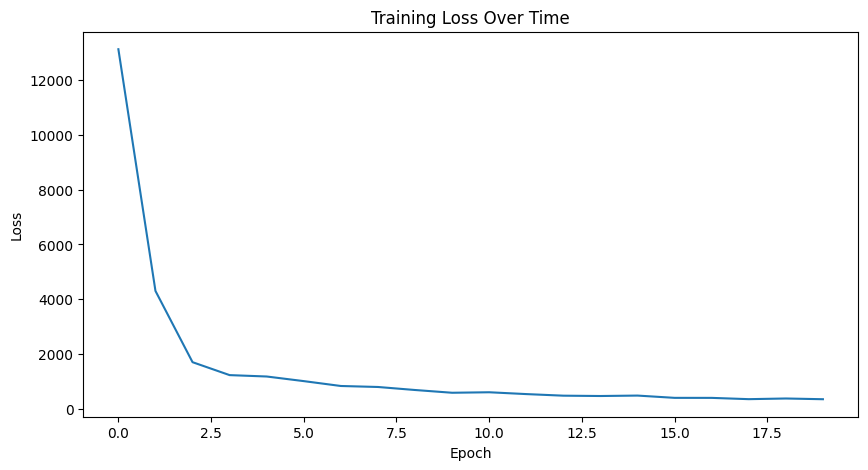

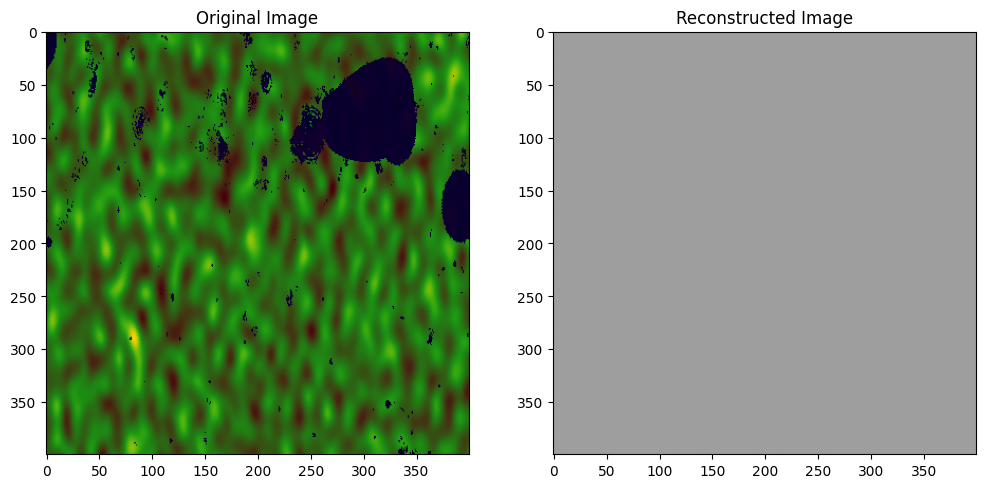

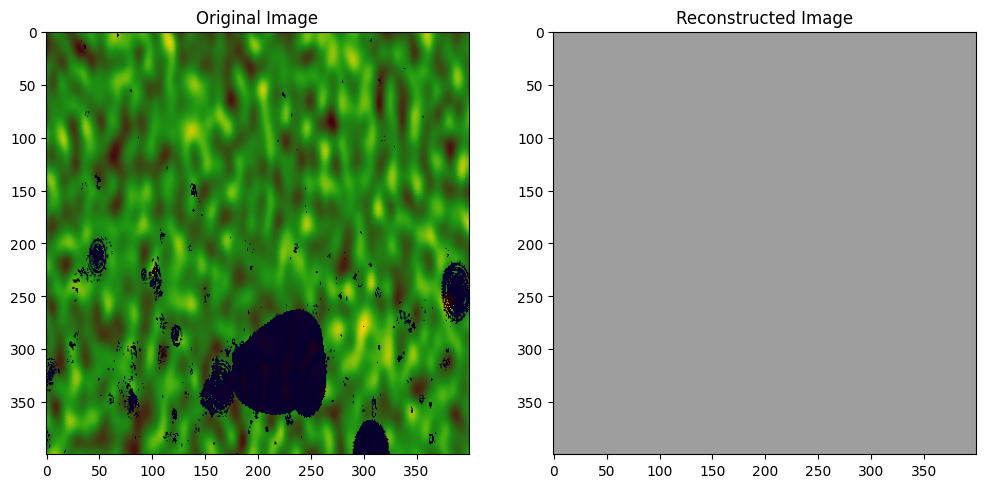

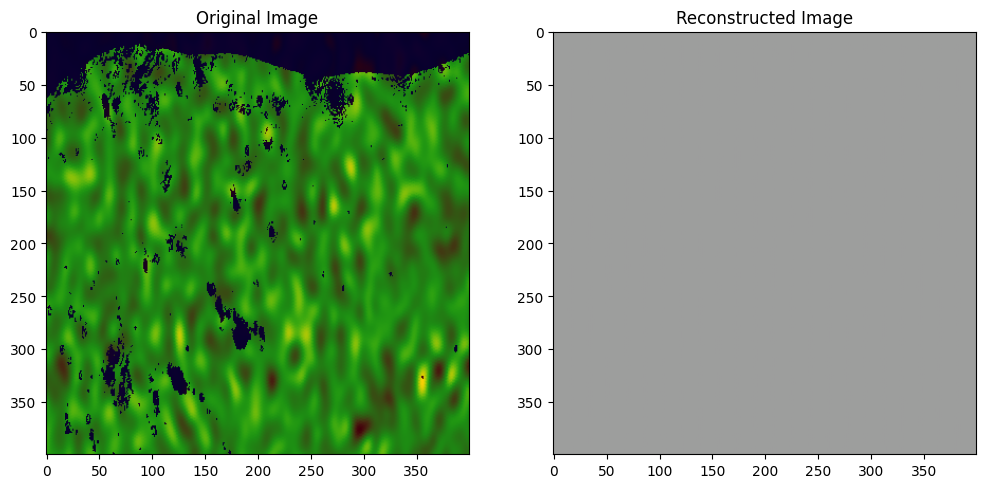

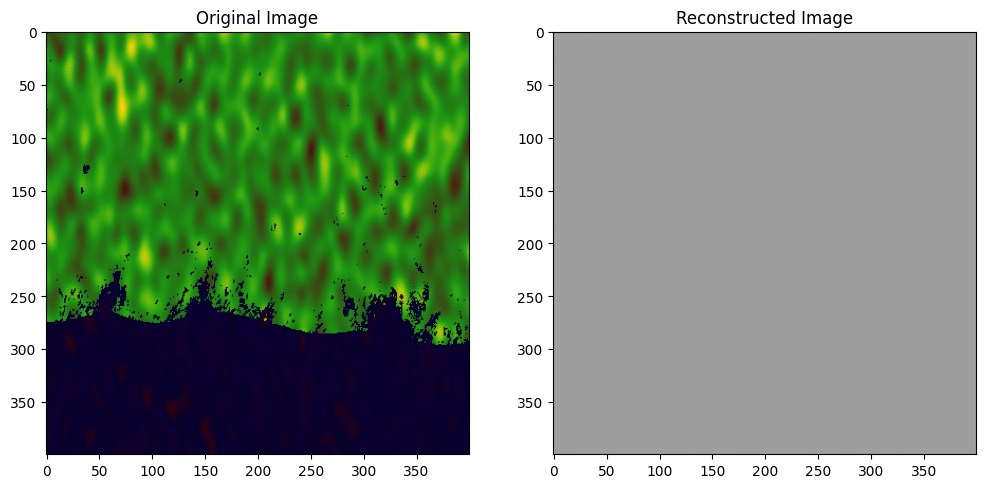

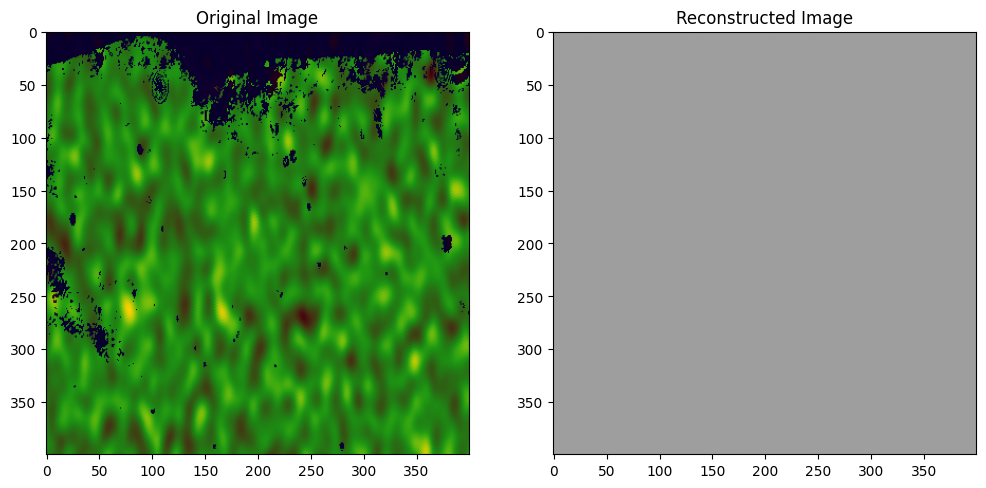

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.cuda.amp import autocast, GradScaler
import gc

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def total_variation_loss(x):
    """Calculate total variation loss."""
    batch_size = x.size(0)
    h_tv = x.size(2)
    w_tv = x.size(3)

    tv_row = torch.sum(torch.abs(x[:, :, :-1] - x[:, :, 1:]))
    tv_col = torch.sum(torch.abs(x[:, :-1] - x[:, 1:]))

    return (tv_row + tv_col) / batch_size


def loss_function(reconstructed, original, mu, log_var, model, beta=0.0001):
    """
    Comprehensive loss function combining reconstruction loss,
    KL divergence, perceptual loss, and total variation loss.
    """
    # Reconstruction Loss (L_rec)
    reconstruction_loss = nn.L1Loss(reduction='mean')(reconstructed, original)

    # KL Divergence (D_KL)
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

    # Perceptual Loss (L_perceptual)
    perceptual_loss = model.perceptual_loss(reconstructed, original)

    # Total Variation Loss (L_TV)
    total_var_loss = total_variation_loss(reconstructed)

    return reconstruction_loss + beta * kl_divergence + perceptual_loss + total_var_loss


def train_epoch(model, train_loader, optimizer, scaler, device, accumulation_steps):
    model.train()
    total_loss = 0
    optimizer.zero_grad()

    for i, images in enumerate(tqdm(train_loader, desc="Training")):
        images = images.to(device)

        # Normalize images to [0, 1] if not already done
        images = images / 255.0 if images.max() > 1 else images

        with autocast():
            reconstructed, mu, log_var = model(images)
            loss = loss_function(reconstructed, images, mu, log_var, model)
            loss = loss / accumulation_steps

        scaler.scale(loss).backward()

        # Gradient clipping and optimizer step
        if (i + 1) % accumulation_steps == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        total_loss += loss.item() * accumulation_steps

    return total_loss / len(train_loader)

# Training setup
latent_dim = 2507  # Reduced latent dimension
vae = VAE().to(device)

# Warmup learning rate
optimizer = optim.AdamW(vae.parameters(), lr=1e-5, weight_decay=1e-4)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=2e-4,
    epochs=20,
    steps_per_epoch=len(train_loader),
    pct_start=0.3
)

scaler = GradScaler()

# Main training loop
best_loss = float('inf')
train_losses = []

for epoch in range(num_epochs):
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    gc.collect()

    avg_loss = train_epoch(vae, train_loader, optimizer, scaler, device, accumulation_steps)
    train_losses.append(avg_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Save best model
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': vae.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_loss,
        }, "vae_best.pth")

# Plot training progress
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

@torch.no_grad()
def evaluate(model, test_images, num_samples=5):
    model.eval()
    test_images = test_images.to(device)

    # Normalize images if not already done
    test_images = test_images / 255.0 if test_images.max() > 1 else test_images

    reconstructed_images = []

    for i in range(0, num_samples):
        batch = test_images[i:i+1]  # Process one image at a time to avoid memory issues
        reconstructed_batch, _, _ = model(batch)
        reconstructed_batch = torch.sigmoid(reconstructed_batch)  # Apply sigmoid for BCEWithLogitsLoss

        reconstructed_images.append(reconstructed_batch.cpu())

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    reconstructed_images = torch.cat(reconstructed_images)

    # Visualization with proper normalization
    for i in range(min(num_samples, len(reconstructed_images))):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        img = test_images[i].cpu().permute(1, 2, 0).numpy()
        plt.imshow(img)
        plt.title("Original Image")

        plt.subplot(1, 2, 2)
        recon = reconstructed_images[i].permute(1, 2, 0).numpy()
        plt.imshow(recon)
        plt.title("Reconstructed Image")

        plt.show()


# Evaluate the model
evaluate(vae, masked_test_tensor, num_samples=5)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.cuda.amp import autocast, GradScaler
import gc

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def total_variation_loss(x):
    """Calculate total variation loss."""
    batch_size = x.size(0)
    h_tv = x.size(2)
    w_tv = x.size(3)

    tv_row = torch.sum(torch.abs(x[:, :, :-1] - x[:, :, 1:]))
    tv_col = torch.sum(torch.abs(x[:, :-1] - x[:, 1:]))

    return (tv_row + tv_col) / batch_size

def loss_function(reconstructed, original, mu, log_var, model, beta=0.0001):
    """
    Comprehensive loss function combining reconstruction loss,
    KL divergence, perceptual loss, and total variation loss.
    """
    # Reconstruction Loss (L_rec)
    reconstruction_loss = nn.L1Loss(reduction='mean')(reconstructed, original)

    # KL Divergence (D_KL)
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

    # Perceptual Loss (L_perceptual)
    perceptual_loss = model.perceptual_loss(reconstructed, original)

    # Total Variation Loss (L_TV)
    total_var_loss = total_variation_loss(reconstructed)

    return reconstruction_loss + beta * kl_divergence + perceptual_loss + total_var_loss

def train_epoch(model, train_loader, optimizer, scaler, device, accumulation_steps):
    model.train()
    total_loss = 0
    optimizer.zero_grad()

    for i, images in enumerate(tqdm(train_loader, desc="Training")):
        images = images.to(device)

        # Normalize images to [0, 1] if not already done
        images = images / 255.0 if images.max() > 1 else images

        with autocast():
            reconstructed, mu, log_var = model(images)
            loss = loss_function(reconstructed, images, mu, log_var, model)
            loss = loss / accumulation_steps

        scaler.scale(loss).backward()

        # Gradient clipping and optimizer step
        if (i + 1) % accumulation_steps == 0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()

            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        total_loss += loss.item() * accumulation_steps

    return total_loss / len(train_loader)

def plot_training_progress(train_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    plt.close()

@torch.no_grad()
def evaluate(model, test_images, num_samples=5):
    """
    Evaluate the model and display original vs reconstructed images
    """
    model.eval()
    test_images = test_images.to(device)

    # Normalize images if not already done
    test_images = test_images / 255.0 if test_images.max() > 1 else test_images

    reconstructed_images = []

    # Process images batch by batch
    for i in range(num_samples):
        batch = test_images[i:i+1]
        reconstructed_batch, _, _ = model(batch)
        # Remove sigmoid if using tanh activation in the decoder's final layer
        reconstructed_images.append(reconstructed_batch.cpu())

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    reconstructed_images = torch.cat(reconstructed_images)

    # Create a figure with enough subplots for all images
    fig = plt.figure(figsize=(15, 3 * num_samples))
    plt.subplots_adjust(hspace=0.3)

    for i in range(num_samples):
        # Original image
        plt.subplot(num_samples, 2, 2*i + 1)
        # Ensure proper normalization and channel order
        orig = test_images[i].cpu().permute(1, 2, 0).numpy()
        orig = np.clip(orig, 0, 1)  # Clip values to valid range
        plt.imshow(orig)
        plt.axis('off')
        plt.title(f"Original {i+1}")

        # Reconstructed image
        plt.subplot(num_samples, 2, 2*i + 2)
        recon = reconstructed_images[i].permute(1, 2, 0).numpy()
        recon = np.clip(recon, 0, 1)  # Clip values to valid range
        plt.imshow(recon)
        plt.axis('off')
        plt.title(f"Reconstructed {i+1}")

    plt.show()
    plt.close()

# Training setup
def main():
    latent_dim = 2507  # Reduced latent dimension
    vae = VAE().to(device)
    num_epochs = 20  # Define number of epochs
    accumulation_steps = 4  # Define accumulation steps

    # Warmup learning rate
    optimizer = optim.AdamW(vae.parameters(), lr=1e-5, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=2e-4,
        epochs=num_epochs,
        steps_per_epoch=len(train_loader),
        pct_start=0.3
    )

    scaler = GradScaler()

    # Main training loop
    best_loss = float('inf')
    train_losses = []

    for epoch in range(num_epochs):
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        gc.collect()

        avg_loss = train_epoch(vae, train_loader, optimizer, scaler, device, accumulation_steps)
        train_losses.append(avg_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

        # Save best model
        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save({
                'epoch': epoch,
                'model_state_dict': vae.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': best_loss,
            }, "vae_best.pth")

        # Plot training progress every few epochs
        if (epoch + 1) % 5 == 0:
            plot_training_progress(train_losses)

    # Final training plot
    plot_training_progress(train_losses)

    # Evaluate and visualize results
    evaluate(vae, masked_test_tensor, num_samples=5)

if __name__ == "__main__":
    main()
